In [4]:
# Import Required Libraries
import pandas as pd

# Load the Dataset
csv_file = "C:/Users/abdul/OneDrive/Desktop/medical plant/archive/Medicinal plant dataset.csv"  # Update with the correct path if needed
df = pd.read_csv(csv_file)

# Display the first few rows
print("Dataset Preview:")
print(df.head())


Dataset Preview:
  plant_name                   medical_uses              cures_disease  \
0   Aloevera  Skin treatment, digestion aid  Burns, acne, constipation   
1   Aloevera  Skin treatment, digestion aid  Burns, acne, constipation   
2   Aloevera  Skin treatment, digestion aid  Burns, acne, constipation   
3   Aloevera  Skin treatment, digestion aid  Burns, acne, constipation   
4   Aloevera  Skin treatment, digestion aid  Burns, acne, constipation   

                                          image_path  
0  C:/Users/abdul/OneDrive/Desktop/medical plant/...  
1  C:/Users/abdul/OneDrive/Desktop/medical plant/...  
2  C:/Users/abdul/OneDrive/Desktop/medical plant/...  
3  C:/Users/abdul/OneDrive/Desktop/medical plant/...  
4  C:/Users/abdul/OneDrive/Desktop/medical plant/...  


In [5]:
# Import Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Prepare Data
X = df["plant_name"]  # Input: Plant Name
y = df["medical_uses"] + " | " + df["cures_disease"]  # Output: Medical Use & Cures Disease

# Convert Text Data into Numerical Vectors
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the Model
model = MultinomialNB()
model.fit(X_train, y_train)

print("Model Training Completed ✅")


Model Training Completed ✅


In [6]:
# Import Accuracy Metrics
from sklearn.metrics import accuracy_score

# Predict on Test Set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%



🌿 Plant Name: Aloevera
📖 Predicted Medical Use & Cures: Skin treatment, digestion aid | Burns, acne, constipation


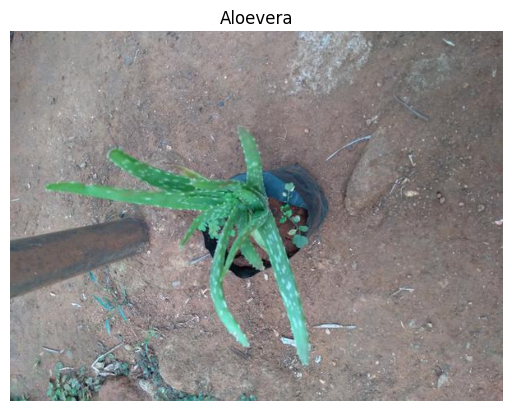

In [8]:
import matplotlib.pyplot as plt
import cv2

# Function to Predict Medical Use & Show Image
def predict_medical_use(plant_name):
    # Convert Input to Vector
    plant_vectorized = vectorizer.transform([plant_name])
    
    # Predict Output
    prediction = model.predict(plant_vectorized)[0]

    # Get Image Path
    plant_data = df[df["plant_name"].str.lower() == plant_name.lower()]
    if not plant_data.empty:
        image_path = plant_data.iloc[0]["image_path"]
    else:
        image_path = None

    # Display Prediction
    print(f"\n🌿 Plant Name: {plant_name}")
    print(f"📖 Predicted Medical Use & Cures: {prediction}")

    # Display Image if Available
    if image_path and isinstance(image_path, str):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img)
        plt.axis("off")
        plt.title(plant_name)
        plt.show()
    else:
        print("⚠️ Image not found for this plant.")

# Example: Predict for 'Aloevera'
plant_name = "Aloevera"
predict_medical_use(plant_name)


In [9]:
import joblib
joblib.dump(model, "medicinal_plant_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']